In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

df.drop_duplicates()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

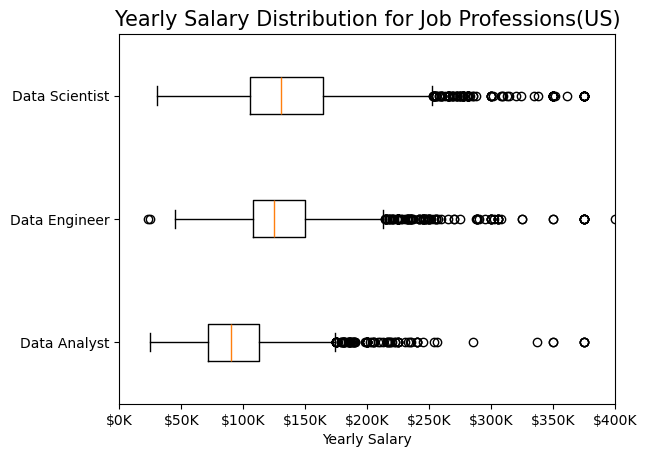

In [6]:
df_og = df.copy()

job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

df_us = df[(df['job_country'] == "United States") & (df['job_title_short'].isin(job_titles))].copy()
df_us.dropna(subset = "salary_year_avg", inplace = True)

df_job_list = [df_us[df_us['job_title_short'] == job_title]["salary_year_avg"] for job_title in job_titles]

plt.boxplot(df_job_list, tick_labels = job_titles, vert = False)
plt.title("Yearly Salary Distribution for Job Professions(US)", fontsize = 15)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f"${int(x/1000)}K"))
plt.xlim(0,400000)
plt.xlabel("Yearly Salary")
plt.show()

In [7]:
# Lets plot it using seaborn way :

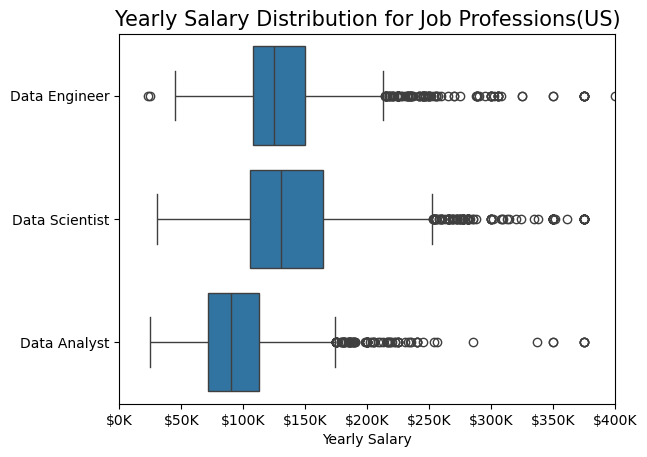

In [9]:
sns.boxplot(data = df_us, x = "salary_year_avg", y = "job_title_short")
plt.title("Yearly Salary Distribution for Job Professions(US)", fontsize = 15)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f"${int(x/1000)}K"))
plt.xlim(0,400000)
plt.ylabel("")
plt.xlabel("Yearly Salary")
plt.show()

In [ ]:
# See Seaborn can handle two argument x and y unlike matplotlib and plotting the same visualization become so simple.
# Matplotlib cannot handle two argument in the boxplot() thats why we have to create the list containing dataframes 
# and then have to plot it indicidually 

# In Seaborn, we need to just filter out df based on requested job professsion(s) and boom just plot it simply. 